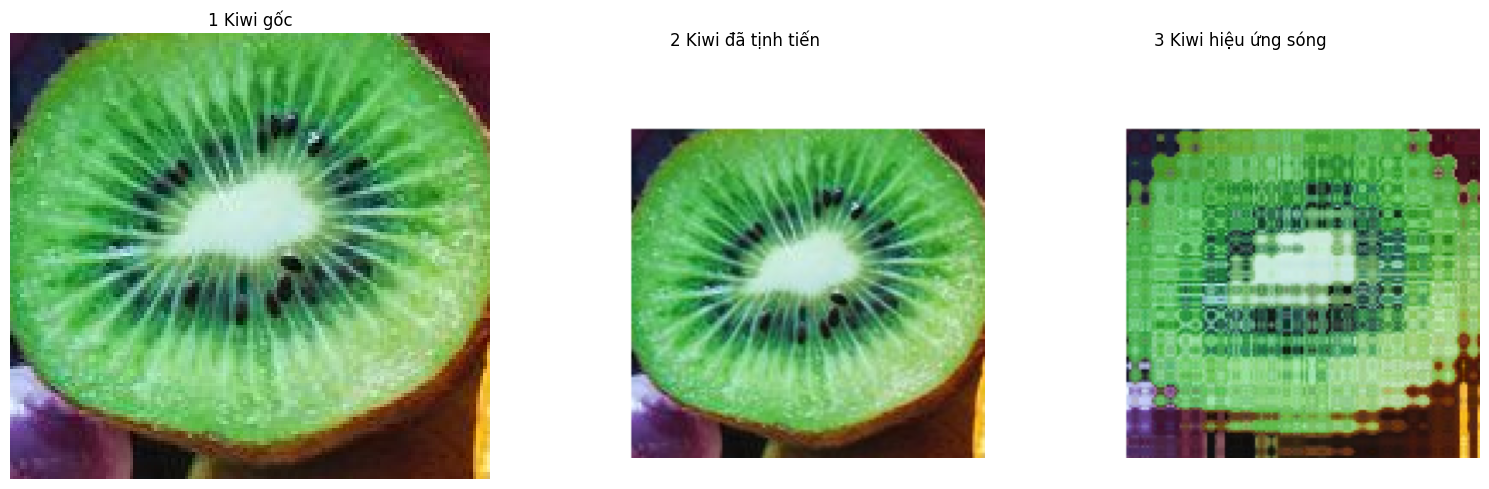

In [19]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import map_coordinates

# Đọc ảnh gốc
img = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')

# Bước 1: Cắt quả kiwi từ ảnh gốc
kiwi = img[140:270, 140:280]

# Bước 2: Tịnh tiến kiwi (50px phải, 30px xuống)
H, W, _ = kiwi.shape
translated = np.ones((H + 30, W + 50, 3), dtype=kiwi.dtype) * 255
translated[30:, 50:] = kiwi

# Bước 3: Áp dụng hiệu ứng sóng (wave effect)
def wave_transform(image, amplitude=5, frequency=0.1):
    H, W = image.shape[:2]
    M = np.indices((H, W))
    dx = amplitude * np.sin(2 * np.pi * M[0] * frequency)
    dy = amplitude * np.sin(2 * np.pi * M[1] * frequency)
    coords = M + np.array([dx, dy])
    coords = coords.reshape(2, -1)

    warped = np.zeros_like(image)
    for c in range(3):
        warped[..., c] = map_coordinates(image[..., c], coords, order=1, mode='reflect').reshape(H, W)
    return warped

kiwi_wave = wave_transform(translated)

# So sánh 3 ảnh
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(kiwi)
plt.title("1️ Kiwi gốc")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(translated.astype(np.uint8))
plt.title("2️ Kiwi đã tịnh tiến")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(kiwi_wave.astype(np.uint8))
plt.title("3️ Kiwi hiệu ứng sóng")
plt.axis('off')

plt.tight_layout()
plt.show()
